In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calibration

In [32]:
calibration_df = pd.read_csv("calibration.csv", delimiter=";")
calibration_df

,home_xg_calibration,away_xg_calibration,home_goals_calibration,away_goals_calibration
0,0.855493,0.934626,0.941699,0.872308


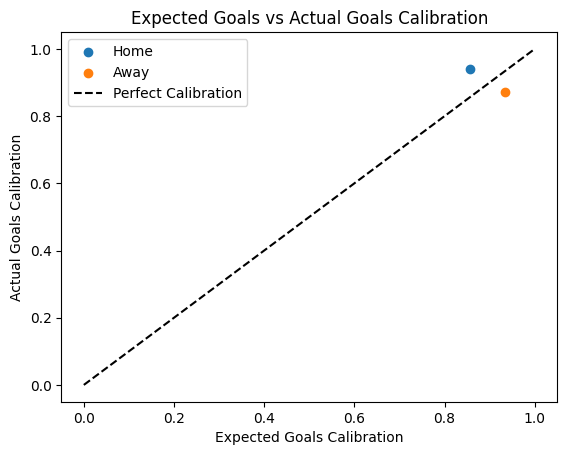

In [33]:
plt.scatter(calibration_df['home_xg_calibration'], calibration_df['home_goals_calibration'], label='Home')
plt.scatter(calibration_df['away_xg_calibration'], calibration_df['away_goals_calibration'], label='Away')
plt.plot([0,1],[0,1], 'k--', label='Perfect Calibration')
plt.xlabel("Expected Goals Calibration")
plt.ylabel("Actual Goals Calibration")
plt.legend()
plt.title("Expected Goals vs Actual Goals Calibration")
plt.show()

# Log Loss Comparison

In [34]:
log_loss_df = pd.read_csv("log_loss.csv", delimiter=";")
log_loss_df

,venomio_log_loss_home_win,venomio_log_loss_away_win,venomio_log_loss_draw_win,venomio_log_loss_overunder_25,market_log_loss_home_win,market_log_loss_away_win,market_log_loss_draw_win,market_log_loss_overunder_25
0,0.630381,0.584948,0.550285,0.671031,0.632407,0.56827,0.54635,0.600276


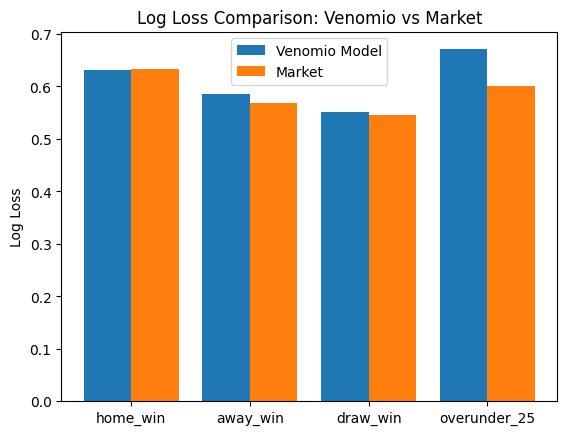

In [35]:
columns = ['home_win', 'away_win', 'draw_win', 'overunder_25']
venomio = [log_loss_df['venomio_log_loss_home_win'][0], log_loss_df['venomio_log_loss_away_win'][0], log_loss_df['venomio_log_loss_draw_win'][0], log_loss_df['venomio_log_loss_overunder_25'][0]]
market = [log_loss_df['market_log_loss_home_win'][0], log_loss_df['market_log_loss_away_win'][0], log_loss_df['market_log_loss_draw_win'][0], log_loss_df['market_log_loss_overunder_25'][0]]

x = np.arange(len(columns))
plt.bar(x - 0.2, venomio, 0.4, label='Venomio Model')
plt.bar(x + 0.2, market, 0.4, label='Market')
plt.xticks(x, columns)
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison: Venomio vs Market')
plt.legend()
plt.show()

# RMSE

In [36]:
rmse_df = pd.read_csv("rmse.csv", delimiter=";")
rmse_df

,rmse_home_xg,rmse_away_xg,rmse_home_goals,rmse_away_goals,benchmark_rmse_home_goals,benchmark_rmse_away_goals
0,0.840257,0.721796,1.16976,1.118426,1.042203,0.891251


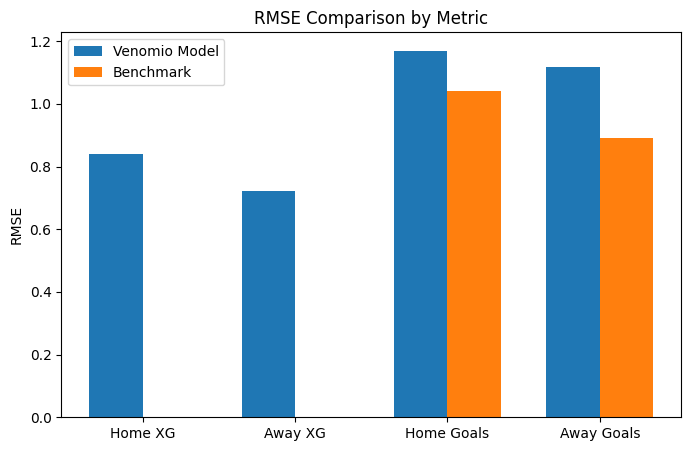

In [39]:
labels = ['Home XG', 'Away XG', 'Home Goals', 'Away Goals']
venomio_rmse = [rmse_df['rmse_home_xg'][0], rmse_df['rmse_away_xg'][0], rmse_df['rmse_home_goals'][0], rmse_df['rmse_away_goals'][0]]
benchmark_rmse = [0, 0, rmse_df['benchmark_rmse_home_goals'][0], rmse_df['benchmark_rmse_away_goals'][0]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, venomio_rmse, width, label='Venomio Model')
ax.bar(x + width/2, benchmark_rmse, width, label='Benchmark')

ax.set_ylabel('RMSE')
ax.set_title('RMSE Comparison by Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

# Betting

In [41]:
betting_df = pd.read_excel("betting_results.xlsx")
betting_df['Date'] = pd.to_datetime(betting_df['Date'])
betting_df = betting_df.sort_values('Date').reset_index(drop=True)
betting_df

,Match,Date,Market,Odds,Market Odds,EV,Result,Bet Amount (%),Profit/Loss (%),minutes_strength
0,Charlotte vs Chicago Fire,2024-10-02,draw,3.569,4.219,0.182124,-1.0,0.025802,-0.025802,0.912100
1,Atlanta Utd vs CF Montréal,2024-10-02,s1_3,30.675,37.330,0.216952,-1.0,0.002854,-0.002854,0.955800
2,Atlanta Utd vs CF Montréal,2024-10-02,s0_2,24.331,33.000,0.356294,-1.0,0.005321,-0.005321,0.955800
3,Atlanta Utd vs CF Montréal,2024-10-02,s0_3,44.643,72.670,0.627803,-1.0,0.004186,-0.004186,0.955800
4,Atlanta Utd vs CF Montréal,2024-10-02,under_35,1.716,1.750,0.019814,1.0,0.012625,0.009469,0.955800
...,...,...,...,...,...,...,...,...,...,...
3041,Crystal Palace vs Newcastle Utd,2024-11-30,draw,3.473,3.491,0.005183,1.0,0.000921,0.002294,0.885150
3042,Criciúma vs Corinthians,2024-11-30,away_p075,1.168,1.220,0.044521,1.0,0.069245,0.015234,0.865565
3043,Criciúma vs Corinthians,2024-11-30,away_m075,2.185,2.580,0.180778,1.0,0.049517,0.078238,0.865565
3044,West Ham vs Arsenal,2024-11-30,under_15,3.043,4.650,0.528097,-1.0,0.057139,-0.057139,0.789850


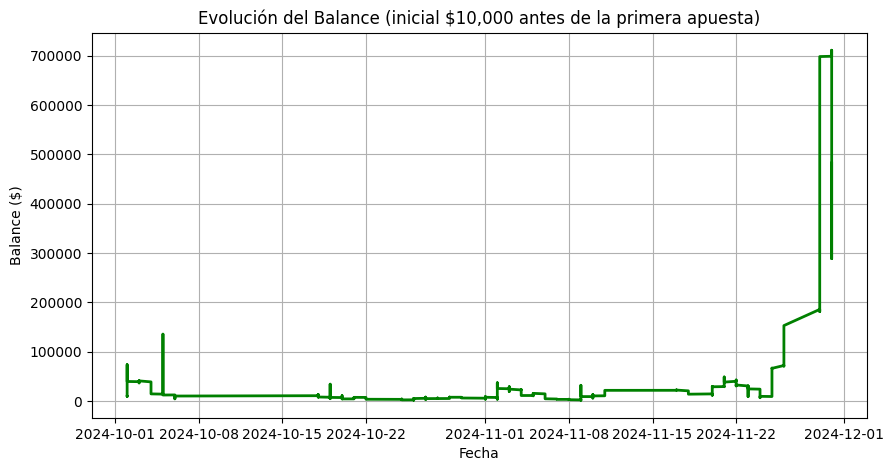

In [46]:
starting_balance = 10_000
previous_balance = starting_balance

betting_df['Profit_Amount'] = 0.0
betting_df['Balance'] = 0.0

for i in range(len(betting_df)):
    pl_pct = betting_df.loc[i, 'Profit/Loss (%)']
    profit_amount = previous_balance * pl_pct
    new_balance = previous_balance + profit_amount

    betting_df.loc[i, 'Profit_Amount'] = profit_amount
    betting_df.loc[i, 'Balance'] = new_balance

    previous_balance = new_balance

plt.figure(figsize=(10,5))
plt.plot(betting_df['Date'], betting_df['Balance'], lw=2, color='green')
plt.title("Evolución del Balance (inicial $10,000 antes de la primera apuesta)")
plt.xlabel("Fecha")
plt.ylabel("Balance ($)")
plt.grid(True)
plt.show()


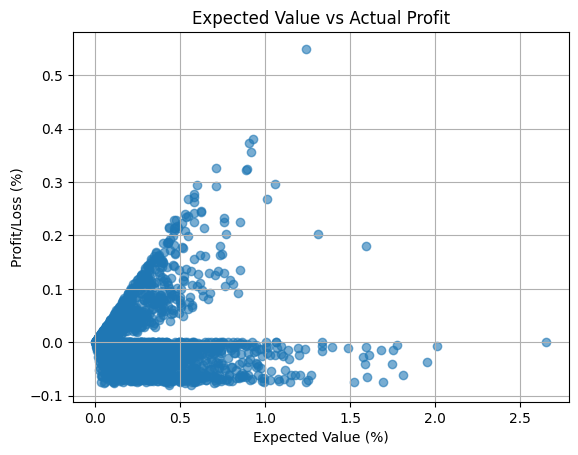

In [47]:
plt.scatter(betting_df['EV'], betting_df['Profit/Loss (%)'], alpha=0.6)
plt.title("Expected Value vs Actual Profit")
plt.xlabel("Expected Value (%)")
plt.ylabel("Profit/Loss (%)")
plt.grid(True)
plt.show()

In [48]:
results_df = pd.DataFrame(betting_df)

# Convert numeric columns to proper types
results_df['Market Odds'] = pd.to_numeric(results_df['Market Odds'], errors='coerce')
results_df['Odds'] = pd.to_numeric(results_df['Odds'], errors='coerce')
results_df['EV'] = pd.to_numeric(results_df['EV'], errors='coerce')
results_df['Result'] = pd.to_numeric(results_df['Result'], errors='coerce')
results_df['Bet Amount (%)'] = pd.to_numeric(results_df['Bet Amount (%)'], errors='coerce')
results_df['Profit/Loss (%)'] = pd.to_numeric(results_df['Profit/Loss (%)'], errors='coerce')

column_order = ['Match', 'Date', 'Market', 'Odds', 'Market Odds', 'EV', 
                'Result', 'Bet Amount (%)', 'Profit/Loss (%)', 'minutes_strength']
results_df = results_df[column_order]

results_df.to_excel('betting_results.xlsx', index=False)

print(f"Betting results saved to 'betting_results.xlsx'")

# Calculate statistics by market
print(f"\n--- Statistics by Market Type ---")

# Group by market and calculate statistics
market_stats = results_df.groupby('Market').agg({
    'Market Odds': 'mean',
    'Result': ['count', lambda x: (x > 0).sum(), lambda x: (x < 0).sum()],
    'Profit/Loss (%)': 'sum',
    'Bet Amount (%)': 'mean'
}).round(2)

# Flatten column names
market_stats.columns = ['Avg Market Odds', 'Total Bets', 'Winning Bets', 'Losing Bets', 'Total P/L (%)', 'Avg Bet Amount (%)']

# Calculate win rate and average winning market odds
market_stats['Win Rate (%)'] = (market_stats['Winning Bets'] / market_stats['Total Bets'] * 100).round(2)

# Calculate average winning market odds (only for winning bets)
winning_bets_stats = results_df[results_df['Result'] > 0].groupby('Market')['Market Odds'].mean().round(2)
winning_bets_stats = winning_bets_stats.fillna(0)  # Handle cases with no winning bets
market_stats['Avg Winning Market Odds'] = winning_bets_stats

# Reorder columns for better readability
market_stats = market_stats[['Total Bets', 'Winning Bets', 'Losing Bets', 'Win Rate (%)', 
                            'Total P/L (%)', 'Avg Bet Amount (%)', 'Avg Market Odds', 'Avg Winning Market Odds']]

print(market_stats)

# Overall statistics
total_bets = len(results_df)
winning_bets = len(results_df[results_df['Result'] > 0])
losing_bets = len(results_df[results_df['Result'] < 0])
push_bets = len(results_df[results_df['Result'] == 0])
total_pl = results_df['Profit/Loss (%)'].sum()
win_rate = (winning_bets / total_bets) * 100 if total_bets > 0 else 0
avg_market_odds = results_df['Market Odds'].mean()
avg_bet_amount = results_df['Bet Amount (%)'].mean()

print(f"\n--- Overall Statistics ---")
print(f"Total bets placed: {total_bets}")
print(f"Winning bets: {winning_bets}")
print(f"Push bets: {push_bets}")
print(f"Losing bets: {losing_bets}")
print(f"Win rate: {win_rate:.2f}%")
print(f"Total P/L: {total_pl:.2f}%")
print(f"Average market odds: {avg_market_odds:.2f}")
print(f"Average bet amount: {avg_bet_amount:.2f}%")

Betting results saved to 'betting_results.xlsx'

--- Statistics by Market Type ---
           Total Bets  Winning Bets  Losing Bets  Win Rate (%)  Total P/L (%)  \
Market                                                                          
away              138            39           99         28.26           0.99   
away_0            150            45           64         30.00           0.83   
away_m025         122            40           32         32.79           2.88   
away_m075         109            37           72         33.94           0.76   
away_p025         154            86           68         55.84           0.91   
away_p075         159            85           74         53.46           1.29   
draw              161            36          125         22.36           0.04   
home               76            29           47         38.16           0.40   
home_0             84            31           34         36.90           0.13   
home_m025          77     

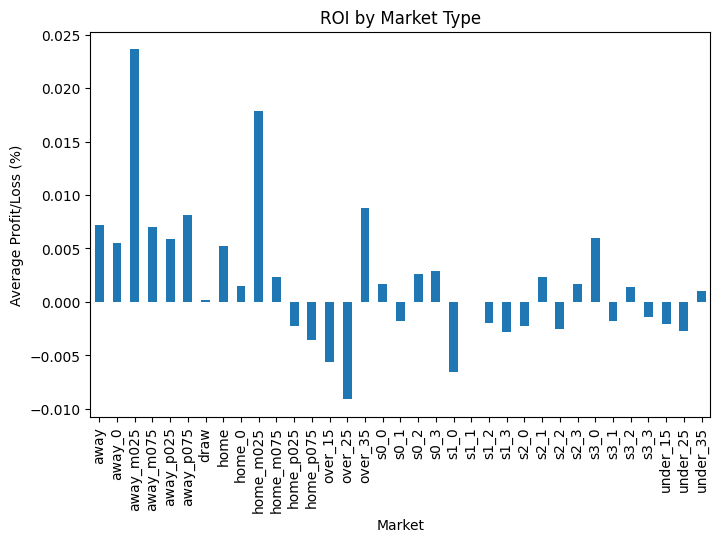

In [49]:
roi_by_market = betting_df.groupby('Market')['Profit/Loss (%)'].mean()
roi_by_market.plot(kind='bar', figsize=(8,5))
plt.title("ROI by Market Type")
plt.ylabel("Average Profit/Loss (%)")
plt.show()
